In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import FinanceDataReader as dr

In [2]:
df = dr.DataReader('034730', '2021')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,241000,250000,240000,249500,561491,0.037422
2021-01-05,248000,252000,245500,251500,478166,0.008016
2021-01-06,255500,284500,254500,273000,2378756,0.085487
2021-01-07,286000,298000,277000,296000,1946685,0.084249
2021-01-08,304000,305000,287500,292500,1177820,-0.011824
2021-01-11,297000,312500,282000,290000,1406142,-0.008547
2021-01-12,288500,291500,272500,281500,795811,-0.029310
2021-01-13,293500,301000,289000,296500,1017559,0.053286
2021-01-14,299000,310000,298500,306000,912334,0.032040


- 결측값 채우기

In [3]:
if df.isnull().values.any():
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')

- 그래프에 그리드 넣기

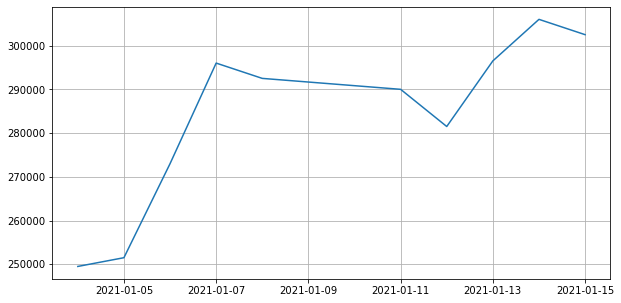

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'])
plt.grid(True)

- 산점도

Text(0, 0.5, 'Price')

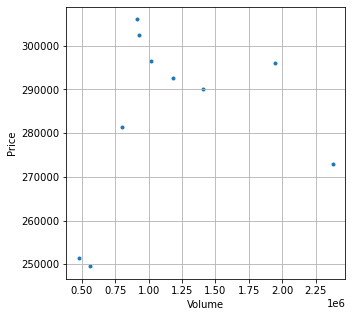

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(df['Volume'], df['Close'], marker='.')
plt.grid(True)
plt.xlabel('Volume')
plt.ylabel('Price')

- 행렬 연산

In [6]:
m = np.arange(12).reshape(3, 4)
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
# 열 합계
m.sum(axis=0)

array([12, 15, 18, 21])

In [8]:
# 행 합계
m.sum(axis=1)

array([ 6, 22, 38])

In [9]:
# 전체 합계
m.sum()

66

In [10]:
m.max()
m.min()
m.mean()
m.std()
# 누적 합
m.cumsum()
# 누적 곱
m.cumprod(axis=0)

array([[  0,   1,   2,   3],
       [  0,   5,  12,  21],
       [  0,  45, 120, 231]], dtype=int32)

- 전체 그래프 설정

In [11]:
# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 5)

- 여러 개 그래프

(array([1., 3., 0., 1., 0., 2., 0., 1., 0., 2.]),
 array([-0.02931034, -0.0178306 , -0.00635086,  0.00512888,  0.01660862,
         0.02808837,  0.03956811,  0.05104785,  0.06252759,  0.07400734,
         0.08548708]),
 <a list of 10 Patch objects>)

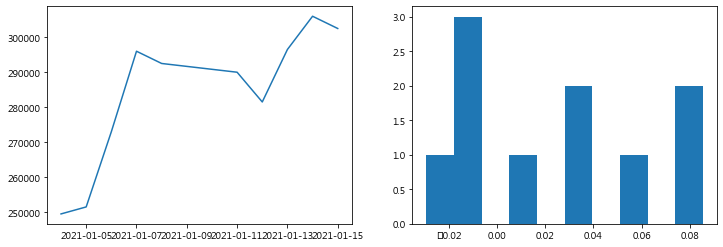

In [21]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1, 2, 1)  # 1행 2열 중 1번째
ax1.plot(df['Close']) 

ax2 = fig.add_subplot(1, 2, 2)  # 1행 2열 중 2번째
ax2.hist(df['Change']) 

(array([1., 3., 0., 1., 0., 2., 0., 1., 0., 2.]),
 array([-0.02931034, -0.0178306 , -0.00635086,  0.00512888,  0.01660862,
         0.02808837,  0.03956811,  0.05104785,  0.06252759,  0.07400734,
         0.08548708]),
 <a list of 10 Patch objects>)

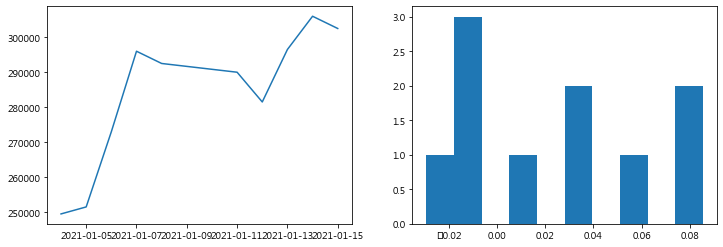

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(df['Close']) 
axes[1].hist(df['Change'])

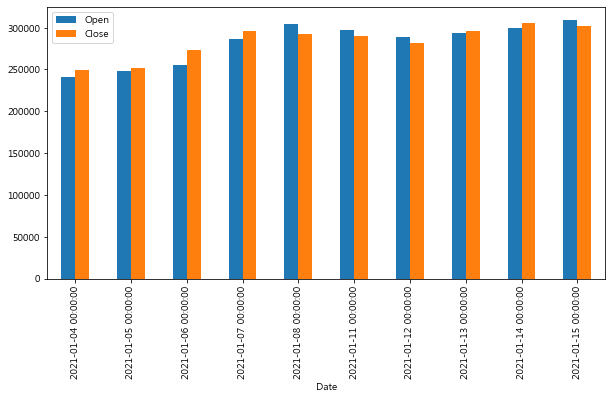

In [25]:
df[['Open', 'Close']].plot.bar()

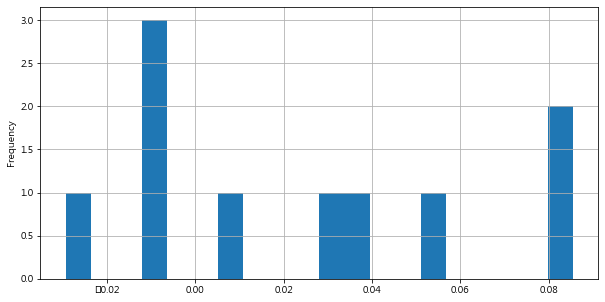

In [28]:
df['Change'].plot.hist(bins=20, grid=True)

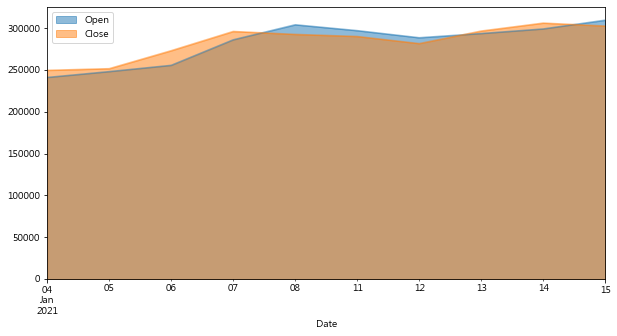

In [30]:
df[['Open', 'Close']].plot.area(stacked=False)

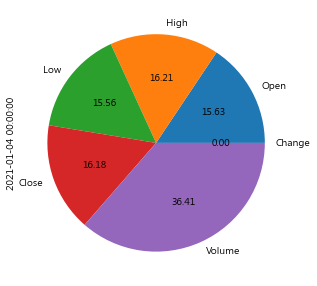

In [32]:
df.iloc[0].plot.pie(autopct='%.2f')

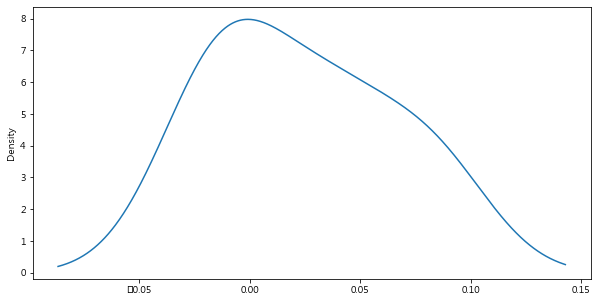

In [34]:
df['Change'].plot.kde()

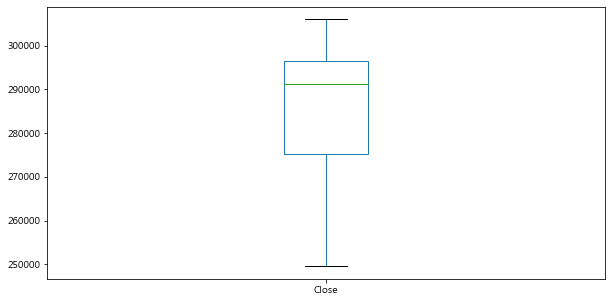

In [38]:
df['Close'].plot.box()

- 문자열 패턴 찾기 re

In [ ]:
re.match('-', str)
re.search('-', str)
re.findall('[0-9]', str)
re.findall('[0|1|2]', str)
re.split('-', str)
re.sub('-', '', str) # 바꾸기

In [ ]:
re.search('AB*', str) # 0회 이상
re.search('AB+', str) # 1회 이상
re.search('AB?', str) # 1회 이하
re.search('^AB', str) # AB로 시작
re.match('AB', str) # AB로 시작

In [ ]:
# 간편식
# \d == [0-9] 숫자
# \D == [^0-9] 숫자 제외
# \w 숫자 또는 문자
# \W 숫자, 문자 제외
# \s 공백
# \S 공백 제외